<a href="https://colab.research.google.com/github/aish0606/ImageProcessing/blob/main/template_mathching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cp -r /gdrive/MyDrive/DATA .

Template matching is a technique in digital image processing for finding small parts of an image which match a template image.

In [ ]:
# https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
# https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

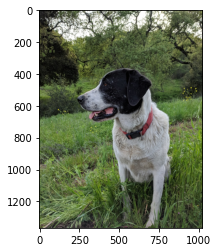

In [ ]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

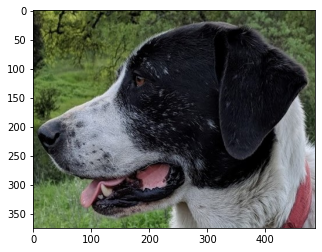

In [ ]:
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [ ]:
height, width, channels = face.shape
print(height, width)

375 486


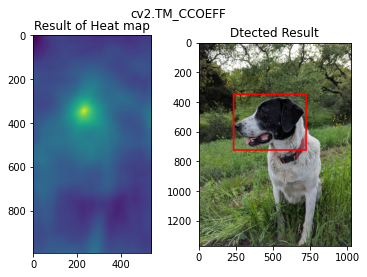

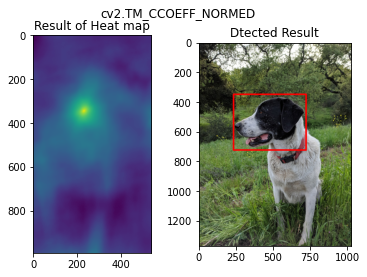

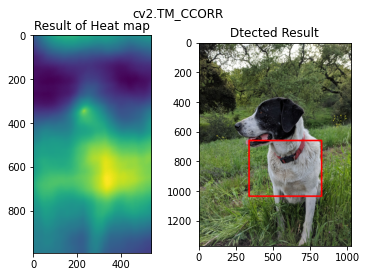

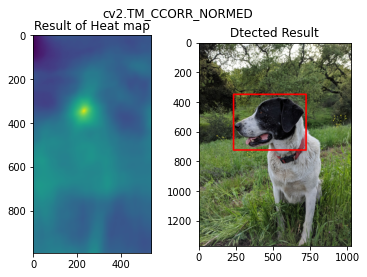

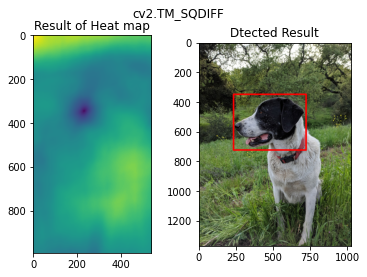

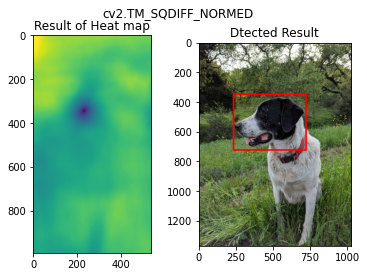

In [ ]:
# All the 6 methods for comparison in a list
# Here we have methods in strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
    # Create a copy of the image
    full_copy = full.copy()
    # Get the actual function instead of the string
    method = eval(m)
    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    # Grab the max and min values and their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc 
    
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)
    # Draw the rectangle
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    # Plot the heat map and image
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Result of Heat map")

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Dtected Result")
    # Setting the Super title
    plt.suptitle(m)
    plt.show()
    print('\n\n')